## Lab 3: Let create point maps of traffic accidents in Philadelphia
In the lab 1 and lab 2, we touch a little bit about using geopandas to open the shapefile of the traffic accidents in Philadelphia. This week we are going to know more in-depth info of how to use Python to open shapefile and plot point maps.

In this lab, you will learn something about read shapefile, the structure of dataframe, plot point map, 
 - Read shapefile, using geopandas to read the traffic accident map
 - Do explorative analysis of the traffic accident
 - Plot the traffic accident point maps

## Step 1: Prepare the shapefile and read shapefiles in geopandas
Make sure you can download the data folder from my github repository. Then copy the `data` folder to the save directory with your lab3 `.ipynb` file. If you failed to do this, you code will not be able to find your dataset. 

There are two shapefiles will be used in this lab work, the traffic accidents map, and the city boundary map. Both of these files can be downloaded from my github account. I collected these two files from philadelphia city government's website. For example, you can find the metadata of the accidents map from here, the metadata of the collision crash in Philadelphia is from, http://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c410c6431621f086214c7cd/

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt

# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crash_data_collision_crash_2007_2017.shp'
city_limit_shp = 'data/City_Limits.shp'

car_crash_df = gpd.read_file(crash_data_shp)
city_limit_df = gpd.read_file(city_limit_shp)

the geopandas will read the shapefile as a data frame with `geometry` column. You can print the first five rows by using `.head()`. This is used to let you check the data structure. 

In [52]:
car_crash_df.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96689999993436 40.08220000023073)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19459999988942 39.97510000036561)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21709999966458 40.03569999985604)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210000011426 39.95109999976609)


In [53]:
# print the all columns in the dataframe of accident data
car_crash_df.columns

Index(['county_nam', 'objectid_1', 'objectid', 'crn', 'district', 'county',
       'municipali', 'crash_year', 'crash_mont', 'day_of_wee', 'time_of_da',
       'hour_of_da', 'illuminati', 'weather', 'road_condi', 'collision_',
       'relation_t', 'work_zone_', 'work_zon_1', 'work_zon_2', 'intersect_',
       'tcd_type', 'location_t', 'urban_rura', 'fatal_coun', 'injury_cou',
       'person_cou', 'total_unit', 'sch_bus_in', 'sch_zone_i', 'latitude',
       'longitude', 'arrival_tm', 'cons_zone_', 'dispatch_t', 'est_hrs_cl',
       'lane_close', 'ln_close_d', 'ntfy_hiwy_', 'spec_juris', 'tcd_func_c',
       'tfc_detour', 'workers_pr', 'wz_close_d', 'wz_flagger', 'wz_ln_clos',
       'wz_moving', 'wz_other', 'wz_shlder_', 'vehicle_co', 'automobile',
       'motorcycle', 'bus_count', 'small_truc', 'heavy_truc', 'suv_count',
       'van_count', 'bicycle_co', 'maj_inj_co', 'mod_inj_co', 'min_inj_co',
       'tot_inj_co', 'unk_inj_de', 'unk_inj_pe', 'driver_cou', 'driver_c_1',
       'driver

#### Before creating map, let create visualization to see the data first, the descriptive analysis of the data

Day of the Week code when crash occurred-
1 - Sunday
2 - Monday
3 - Tuesday
4 - Wednesday
5 - Thursday
6 - Friday
7 - Saturday

In [54]:
# we can group all rows by crash_year, crash month, crash data, and even crash hour
year_crash = car_crash_df.groupby('crash_year').size()
month_crash = car_crash_df.groupby('crash_mont').size()
week_crash = car_crash_df.groupby('day_of_wee').size()
hour_crash = car_crash_df.groupby('hour_of_da').size()

#### Let check the grouped result by hour

In [55]:
hour_crash = hour_crash[0:24]
hour_crash

hour_of_da
0     2242
1     1998
2     2424
3     1610
4     1176
5     1267
6     2158
7     3109
8     3880
9     3164
10    3107
11    3236
12    3758
13    3716
14    3902
15    4806
16    4960
17    4762
18    4341
19    3530
20    3038
21    2760
22    2617
23    2578
dtype: int64

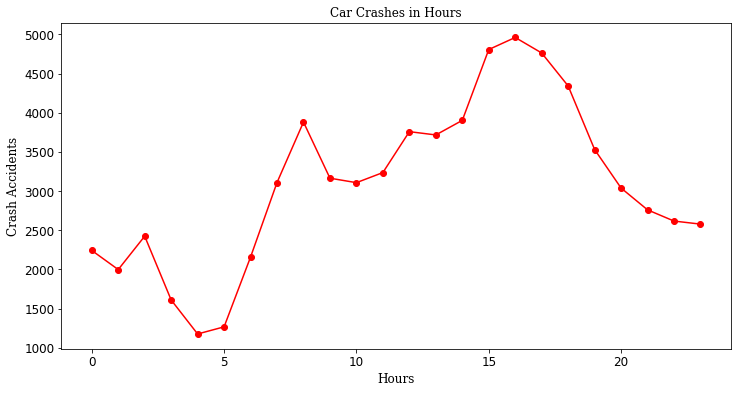

In [59]:
# import matplotlib
from matplotlib import pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

# matplotlib.rcParams['figure.figsize'] = (15.0, 10)
# ax1 = plt.subplot(221)
f, ax1 = plt.subplots(1, figsize=(12, 6))


markeron = range(0,23)
ax1.plot(hour_crash[0:24],color='red', marker = 'o')

ax1.set_title('Car Crashes in Hours', fontdict=font)
ax1.set_xlabel('Hours', fontdict=font)
ax1.set_ylabel('Crash Accidents', fontdict=font)
ax1.tick_params(axis='x', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax1.tick_params(axis='y', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
# set_axis_style(ax2, weeklabel)

# plt.savefig('./figure/fig_num_trips.png',transparent=False,bbox_inches='tight')
# plt.show()


[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

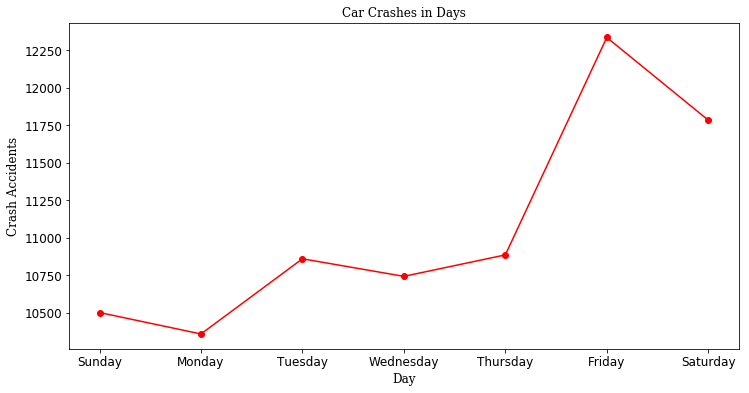

In [60]:
import matplotlib

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

f, ax = plt.subplots(1, figsize=(12, 6))

weeklabel = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax.plot(weeklabel, week_crash, color='red', marker = 'o')
ax.set_title('Car Crashes in Days', fontdict=font)
ax.set_xlabel('Day', fontdict=font)
ax.set_ylabel('Crash Accidents', fontdict=font)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax.tick_params(axis='y', which='major', labelsize=12, rotation=0, zorder=1, direction='out')
ax.set_xticklabels(weeklabel)

# plt.savefig('./figure/fig_num_trips.png',transparent=False,bbox_inches='tight')
# plt.show()


## Step 2: Mapping time, create map of the location of car crashes in Philadelphia

#### Plot the location of all traffic accidents in Philadelphia
- Create a figure with size of width and height of 12x12; 
- using marker of * and color of blue

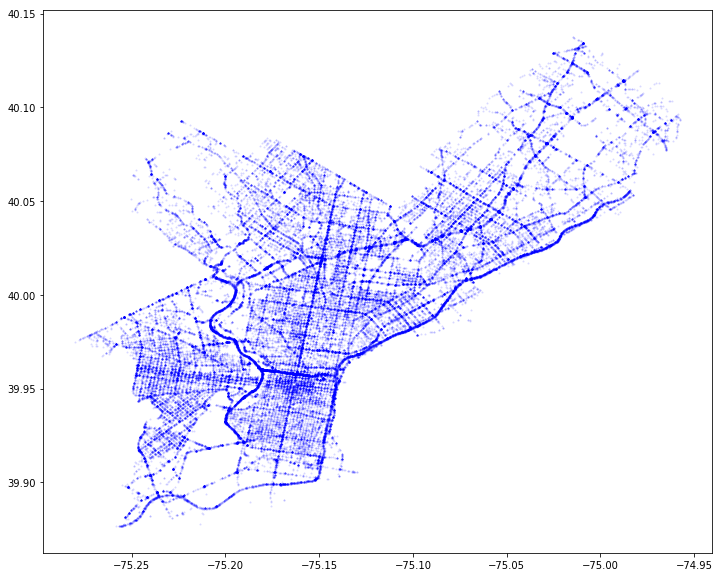

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12, 12))

car_crash_df.plot(marker='*', ax=ax, color='blue', alpha = 0.1, markersize=2);
plt.show()


#### Plot the city limit boundary

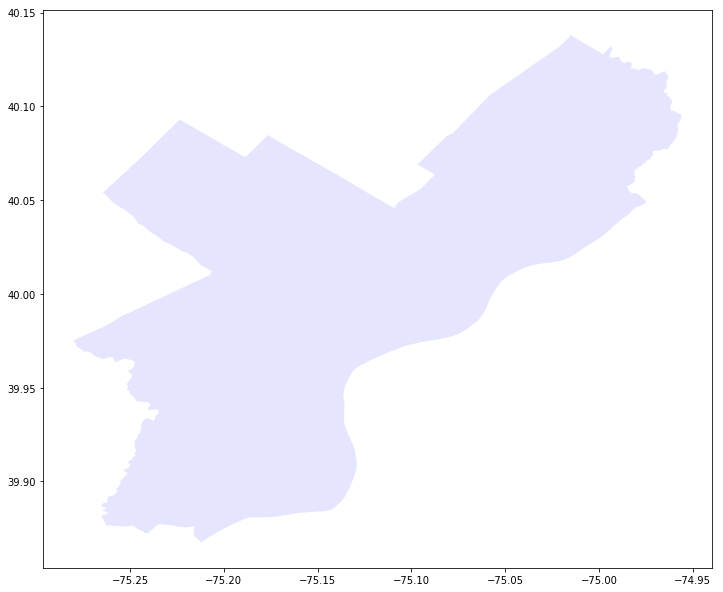

In [62]:
fig, ax = plt.subplots(1, figsize=(12, 12))

city_limit_df.plot( color='blue', ax=ax, alpha = 0.1, markersize=1);
plt.show()


overlay the traffic accidents map with the city bounary map

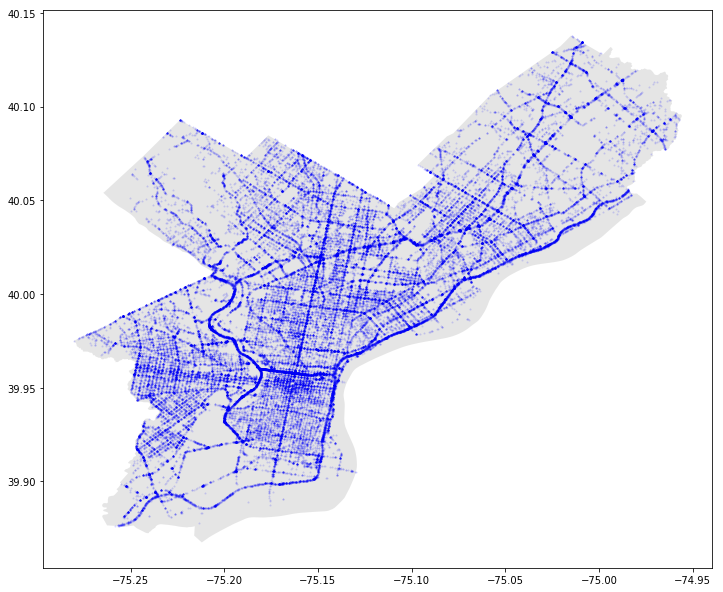

In [76]:
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = city_limit_df.plot(color='grey', ax=ax, alpha = 0.2)
car_crash_df.plot(marker='*', ax=ax, color='blue', alpha = 0.1, markersize=2, legend=True)

plt.show(fig)


filter out the traffic accidents in a specific year

In [77]:
# traffic accident in 2015
crash15 = car_crash_df.loc[car_crash_df['crash_year']==2015]
# traffic accident in 2016
crash16 = car_crash_df.loc[car_crash_df['crash_year']==2016]
# traffic accident in 2017
crash17 = car_crash_df.loc[car_crash_df['crash_year']==2017]

Filter out the traffic accidents in a specific day

In [15]:
crash_monday = car_crash_df.loc[car_crash_df['day_of_wee']==2]
crash_monday.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
18,Philadelphia,11,1009,2017012393,6,67,67301,2017,1,2,...,0,0,0,3,0,40.0336,-75.0199,None,None,POINT (-75.01989999968458 40.03360000014078)
20,Philadelphia,13,1072,2017048718,6,67,67301,2017,5,2,...,0,0,0,0,0,40.0494,-74.9950,None,None,POINT (-74.99499999984943 40.04940000031064)
35,Philadelphia,28,122,2017035699,6,67,67301,2017,3,2,...,0,0,0,8,0,39.9810,-75.1632,None,None,POINT (-75.16319999977952 39.98099999995094)
36,Philadelphia,29,125,2017041395,6,67,67301,2017,4,2,...,0,0,0,4,0,39.9374,-75.1630,None,None,POINT (-75.16300000044902 39.93740000021074)


### Let's plot the traffic accidents in different years
We are going to use different color to mark different years, and we also create legend. The color bar plettee can be found here, 
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

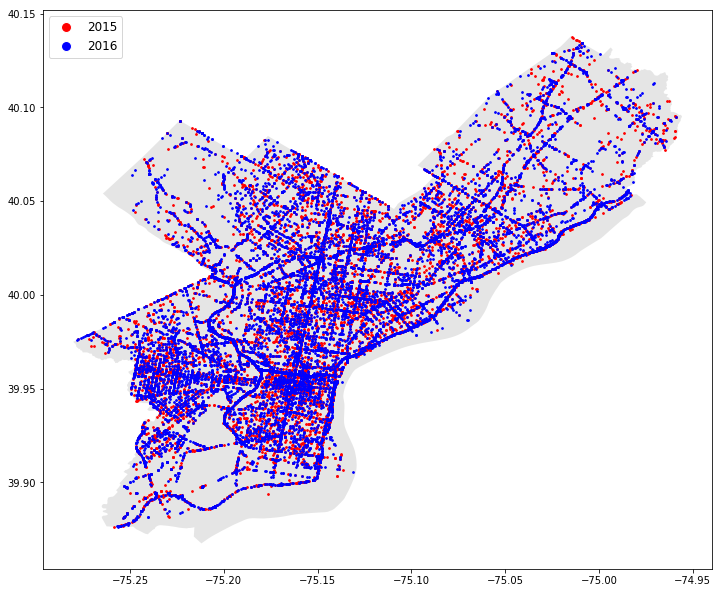

In [24]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager

# create a new window for graphic
fig, ax = plt.subplots(1, figsize=(12, 12))

# plot the city boundary
city_limit_df.plot(color='grey', ax=ax, alpha = 0.2)

# create an empty list to save the legend
legend_lst = []

# 2015 crash data
crash_2015_df = car_crash_df.loc[car_crash_df['crash_year'] == 2015]
crash_plt = crash_2015_df.plot(marker='o',
                  markersize=3,
                  ax=ax, 
                  color=color, 
                  alpha = 1, 
                  legend = True,
                  label="population",
                )

# create legend
legend_patch = Line2D([0], [0], marker='o', 
                    color='w', 
                    label='2015',
                    markerfacecolor='red', 
                    markersize=10
                  )
legend_lst.append(legend_patch)


# 2016 crash data
crash_2016_df = car_crash_df.loc[car_crash_df['crash_year'] == 2016]
crash_plt = crash_2016_df.plot(marker='o',
                  markersize=3,
                  ax=ax, 
                  color='blue', 
                  alpha = 1, 
                  legend = True,
                  label="population",
                )

# create legend
legend_patch = Line2D([0], [0], marker='o', 
                    color='w', 
                    label='2016',
                    markerfacecolor='blue', 
                    markersize=10
                  )
legend_lst.append(legend_patch)


# setting the font type of the graphic
font = font_manager.FontProperties(family='Times',
                                       size= 12,
#                                        weight='bold',
                                       style='normal' 
                                   )
crash_plt = plt.legend(handles=legend_lst, loc='upper left', prop=font)

plt.show()


## Homework - Create map of car crashes in different years
- Create the map of car crash in in 2015 on Monday, 2016 on Monday, and 2017 on Monday
- Use different colors for years of 2015, 2016, and 2017
- Create legends for different years


Hint: 

`crash15 = car_crash_df.loc[car_crash_df['crash_year']==2015]`

`crash15_monday = crash15.loc[crash15['day_of_wee']==2]`

`crash15_monday.head()`
